In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the Dataset

In [2]:
df = pd.read_csv('revenue_prediction.csv')
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


In [3]:
df.shape

(100, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            100 non-null    int64  
 1   Name          100 non-null    object 
 2   Franchise     100 non-null    object 
 3   Category      100 non-null    object 
 4   City          100 non-null    object 
 5   No_Of_Item    100 non-null    int64  
 6   Order_Placed  100 non-null    float64
 7   Revenue       100 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 6.4+ KB


In [5]:
df.isnull().sum()

Id              0
Name            0
Franchise       0
Category        0
City            0
No_Of_Item      0
Order_Placed    0
Revenue         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Id,No_Of_Item,Order_Placed,Revenue
count,100.000000,100.000000,100.000000,1.000000e+02
mean,150.500000,49.080000,4.086000,4.395161e+06
std,29.011492,22.370923,2.055101,2.659932e+06
min,101.000000,18.000000,1.000000,8.498700e+05
25%,125.750000,34.750000,2.750000,2.688328e+06
50%,150.500000,45.000000,3.650000,3.911401e+06
75%,175.250000,57.250000,5.100000,5.330084e+06
max,200.000000,126.000000,13.000000,1.969694e+07


### EDA

In [9]:
df.head()

,Id,Name,Franchise,Category,City,No_Of_Item,Order_Placed,Revenue
0,101,HungryHowie'sPizza,Yes,Mexican,Bengaluru,55,5.5,5953753
1,102,CharleysPhillySteaks,No,Varied Menu,Gurugram,72,6.8,7223131
2,103,Chuy's,Yes,Chicken,Pune,25,1.9,2555379
3,104,O'Charley's,Yes,Italian/Pizza,Mumbai,18,2.5,2175511
4,105,PolloTropical,Yes,Pizza,Noida,48,4.2,4816715


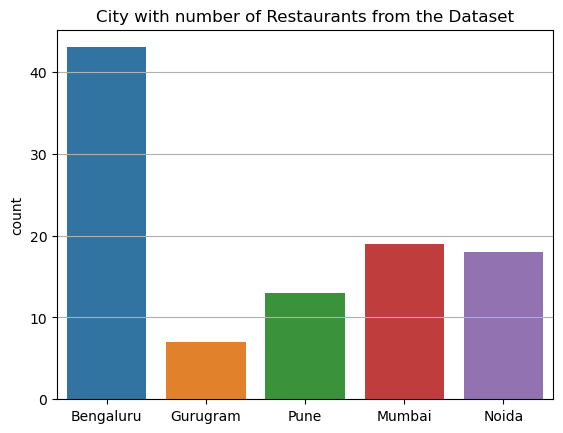

In [15]:
sns.countplot(x=df['City'])
plt.grid(axis='y')
plt.xlabel('')
plt.title('City with number of Restaurants from the Dataset')
plt.show()

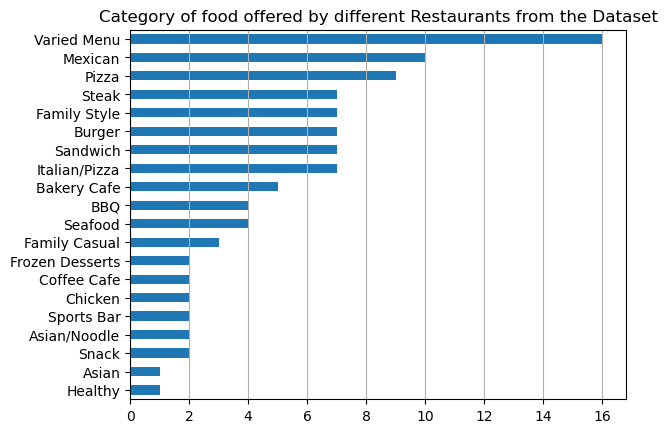

In [18]:
df['Category'].value_counts().sort_values().plot(kind='barh')
plt.grid(axis='x')
plt.ylabel('')
plt.title('Category of food offered by different Restaurants from the Dataset')
plt.show()

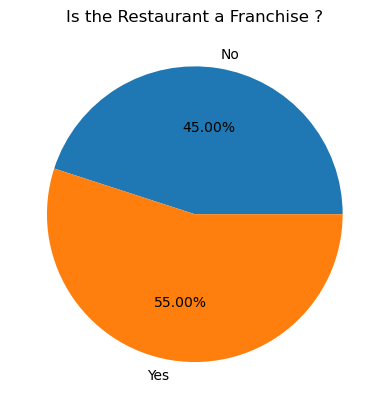

In [23]:
df['Franchise'].value_counts().sort_values().plot.pie(autopct="%.2f%%")
plt.ylabel('')
plt.title('Is the Restaurant a Franchise ?')
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


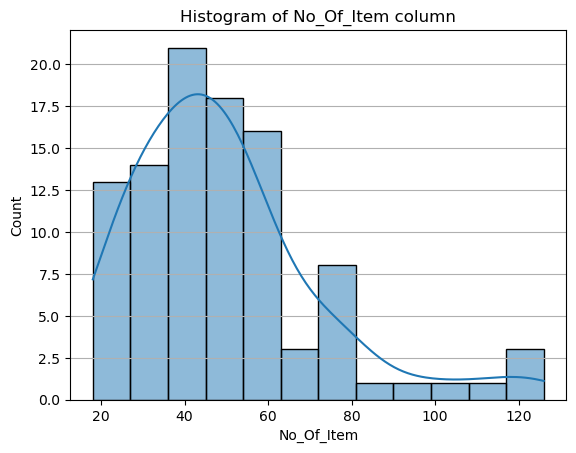

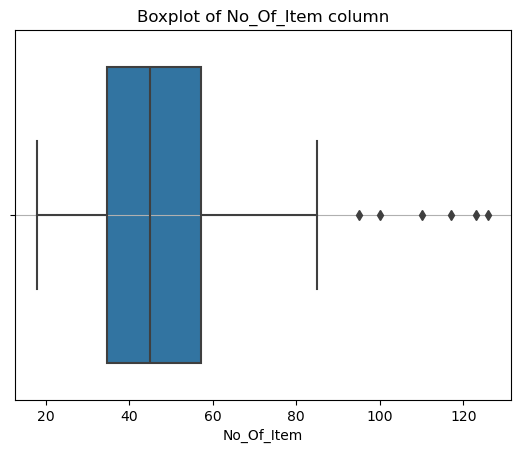

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


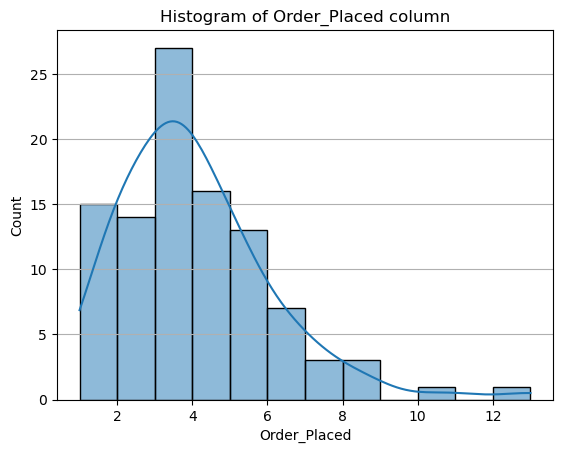

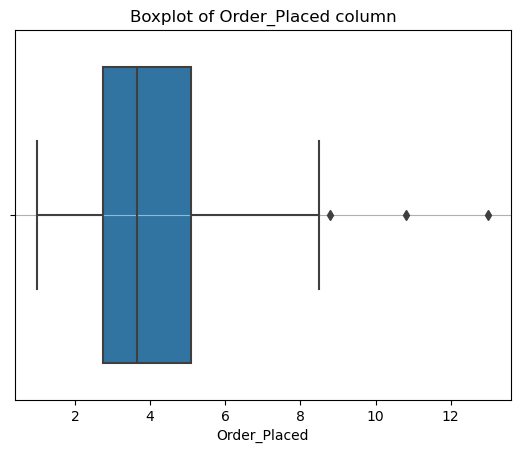

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


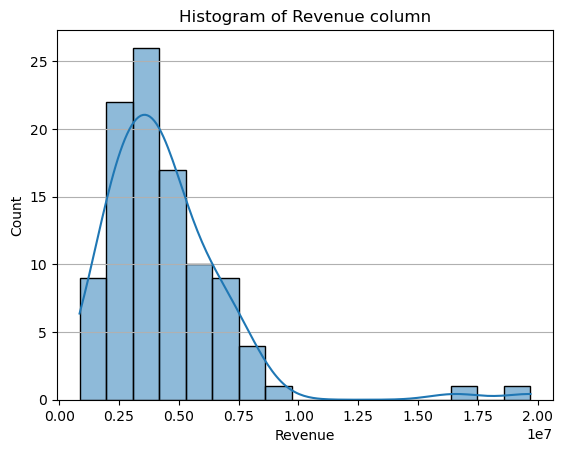

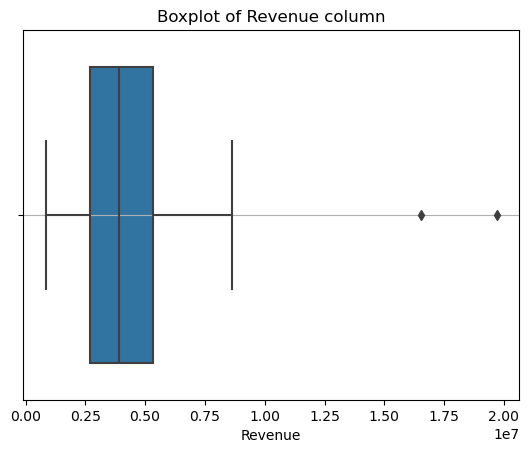

In [27]:
num_cols = ['No_Of_Item','Order_Placed','Revenue']

for i in num_cols:
    sns.histplot(x=df[i],kde=True)
    plt.grid(axis='y')
    plt.title(f'Histogram of {i} column')
    plt.show()
    
    sns.boxplot(x=df[i])
    plt.grid(axis='y')
    plt.title(f'Boxplot of {i} column')
    plt.show()

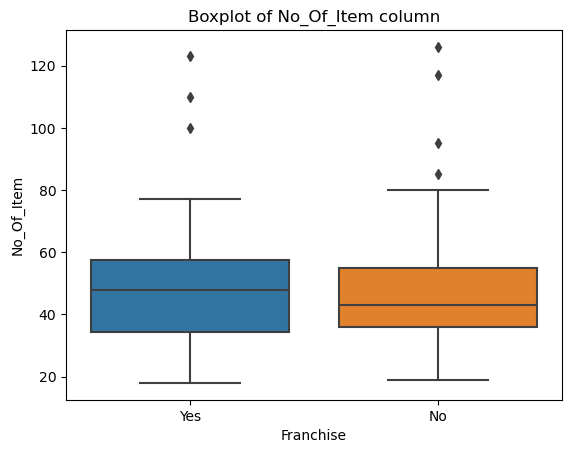

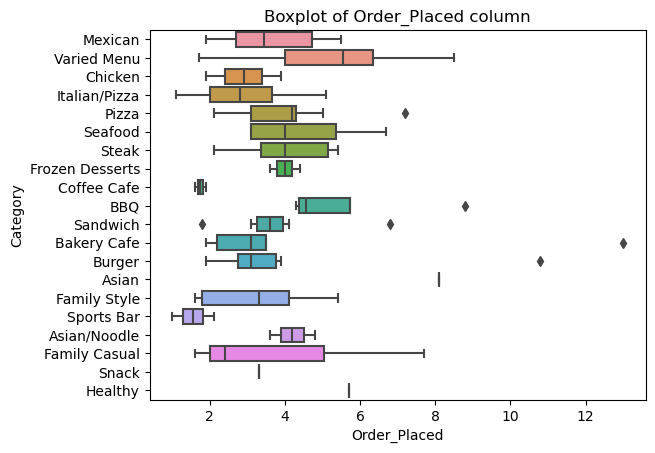

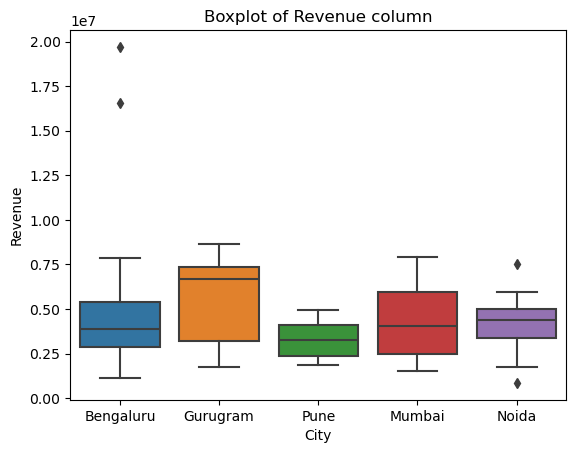

In [30]:
cat_cols = ['Franchise','Category','City']

for i,j in zip(num_cols,cat_cols):
    if j == 'Category':
        sns.boxplot(x=df[i],y=df[j])
        plt.title(f'Boxplot of {i} column')
        plt.show()
    else:
        sns.boxplot(y=df[i],x=df[j])
        plt.title(f'Boxplot of {i} column')
        plt.show()

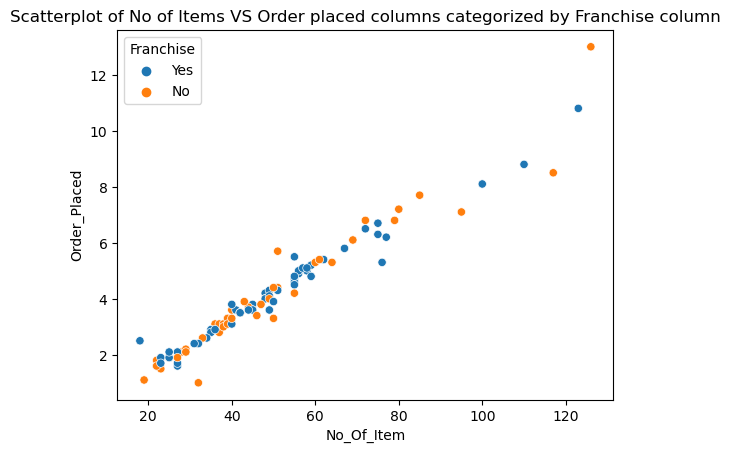

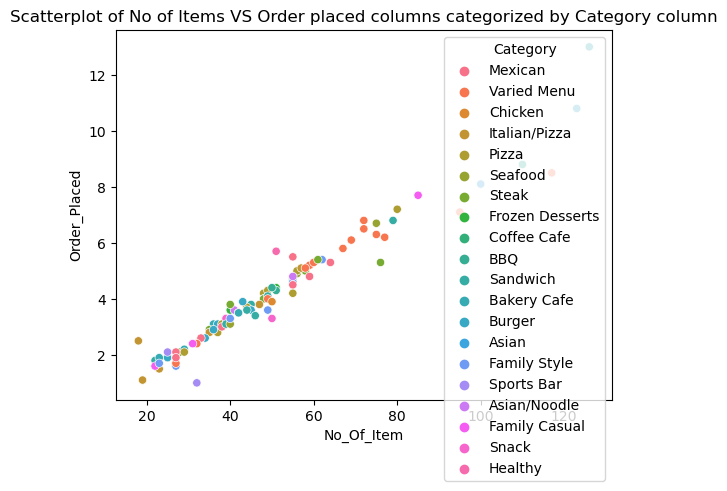

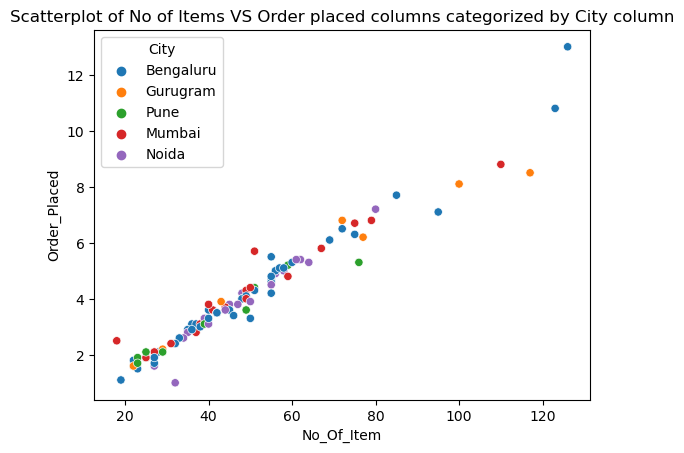

In [35]:
for i in cat_cols:
    sns.scatterplot(x=df['No_Of_Item'],y=df['Order_Placed'],hue=df[i])
    plt.title(f'Scatterplot of No of Items VS Order placed columns categorized by {i} column')
    plt.show()

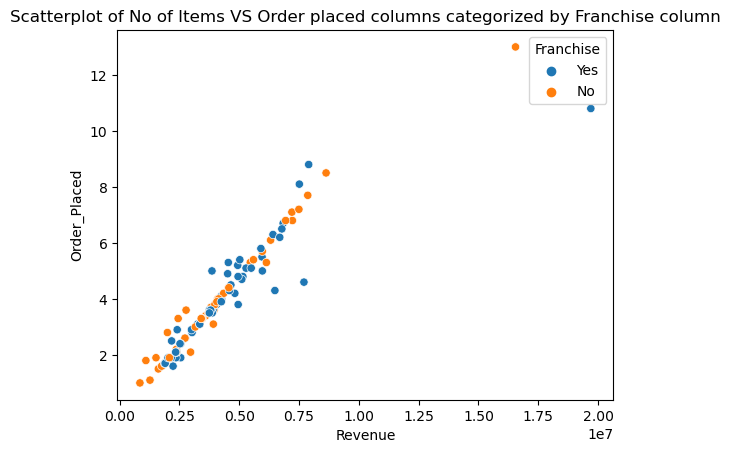

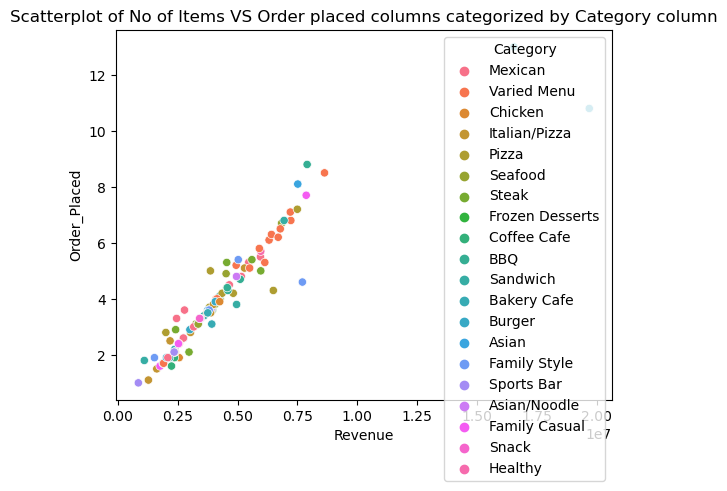

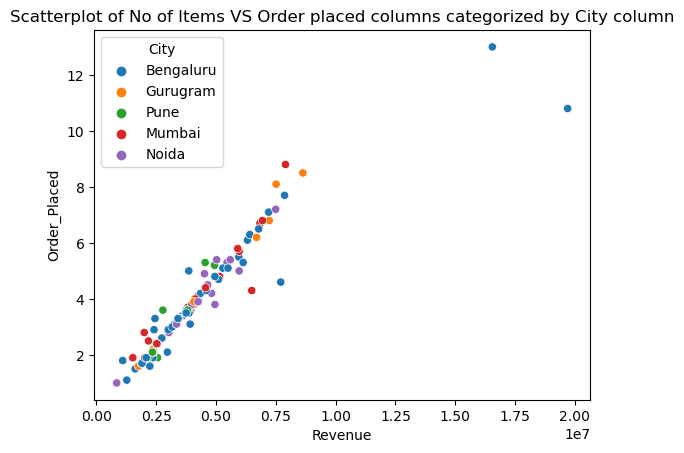

In [36]:
for i in cat_cols:
    sns.scatterplot(x=df['Revenue'],y=df['Order_Placed'],hue=df[i])
    plt.title(f'Scatterplot of No of Items VS Order placed columns categorized by {i} column')
    plt.show()

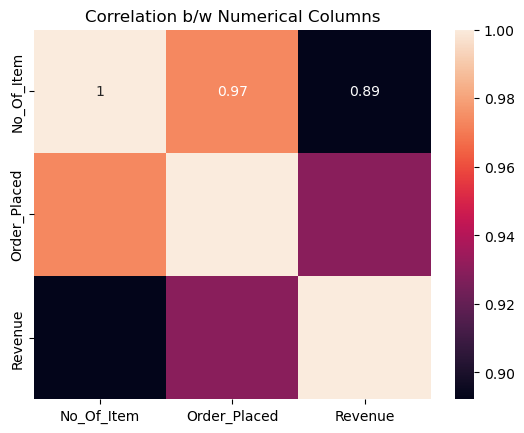

In [126]:
sns.heatmap(df[num_cols].corr(),annot=True)
plt.title('Correlation b/w Numerical Columns')
plt.show()

In [83]:
data = df.copy()
data.shape

(100, 8)

### Preprocessing

In [84]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [85]:
data.Category.unique()

array(['Mexican', 'Varied Menu', 'Chicken', 'Italian/Pizza', 'Pizza',
       'Seafood', 'Steak', 'Frozen Desserts', 'Coffee Cafe', 'BBQ',
       'Sandwich', 'Bakery Cafe', 'Burger', 'Asian', 'Family Style',
       'Sports Bar', 'Asian/Noodle', 'Family Casual', 'Snack', 'Healthy'],
      dtype=object)

In [86]:
categories = pd.get_dummies(data['Category'],drop_first=True).astype(int)
categories.shape

(100, 19)

In [87]:
le = LabelEncoder()
data['City'] = le.fit_transform(data['City'])
data['Franchise'] = le.fit_transform(data['Franchise'])

data = data.drop(columns=['Id','Name','Category'])
data = pd.concat([data,categories],axis=1)
data.shape

(100, 24)

In [88]:
x = data.drop(columns=['Revenue'])
y = data['Revenue']

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

### 1: Linear Regression

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , root_mean_squared_error , mean_absolute_percentage_error 

In [138]:
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

r2 = r2_score(y_test,y_pred_lr)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_lr = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_lr = root_mean_squared_error(y_test,y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test,y_pred_lr)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_lr}\n")
print(f"RMSE is : {rmse_lr}\n")
print(f"MAPE is : {mape_lr}\n")

r2 score is : 0.41562594924238483

Adjusted r2 score is : -1.8244745786618064

RMSE is : 1083781.7050868757

MAPE is : 0.2545015025682584



### 2: Decision Tree

In [97]:
from sklearn.tree import DecisionTreeRegressor

In [139]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

r2 = r2_score(y_test,y_pred_dt)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_dt = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_dt = root_mean_squared_error(y_test,y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test,y_pred_dt)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_dt}\n")
print(f"RMSE is : {rmse_dt}\n")
print(f"MAPE is : {mape_dt}\n")

r2 score is : 0.7856439303307431

Adjusted r2 score is : -0.03605433673474168

RMSE is : 656393.4624420529

MAPE is : 0.1150698872098944



##### Hyperparameter tuning for Decision Tree

In [131]:
from sklearn.model_selection import GridSearchCV

In [140]:
param_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, 
                           param_grid=param_grid, 
                           cv=5)

grid_search.fit(x_train, y_train)

dt = grid_search.best_estimator_
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

r2 = r2_score(y_test,y_pred_dt)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_dt = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_dt = root_mean_squared_error(y_test,y_pred_dt)
mape_dt = mean_absolute_percentage_error(y_test,y_pred_dt)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_dt}\n")
print(f"RMSE is : {rmse_dt}\n")
print(f"MAPE is : {mape_dt}\n")

r2 score is : -0.4656890428400886

Adjusted r2 score is : -6.084163707060428

RMSE is : 1716395.1345971765

MAPE is : 0.3764696019380812



C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
300 fits failed out of a total of 900.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_para

### 3: Bagging Regressor ( Bagging Algorithm )

In [144]:
from sklearn.ensemble import BaggingRegressor

In [145]:
br = BaggingRegressor(estimator=DecisionTreeRegressor(),n_estimators=200,random_state=42)
br.fit(x_train,y_train)
y_pred_br = br.predict(x_test)

r2 = r2_score(y_test,y_pred_br)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_br = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_br = root_mean_squared_error(y_test,y_pred_br)
mape_br = mean_absolute_percentage_error(y_test,y_pred_br)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_br}\n")
print(f"RMSE is : {rmse_br}\n")
print(f"MAPE is : {mape_br}\n")

r2 score is : 0.8494876408792746

Adjusted r2 score is : 0.2725235975831608

RMSE is : 550025.0075273978

MAPE is : 0.10171307960682954



##### Hyperparameter tuning for Bagging Regressor

In [146]:
base_estimator = DecisionTreeRegressor(random_state=42)
bagging_regressor = BaggingRegressor(estimator=base_estimator, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
}

grid_search = GridSearchCV(estimator=bagging_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(x_train,y_train)

br = grid_search.best_estimator_
br.fit(x_train,y_train)
y_pred_br = br.predict(x_test)

r2 = r2_score(y_test,y_pred_br)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_br = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_br = root_mean_squared_error(y_test,y_pred_br)
mape_br = mean_absolute_percentage_error(y_test,y_pred_br)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_br}\n")
print(f"RMSE is : {rmse_br}\n")
print(f"MAPE is : {mape_br}\n")

r2 score is : 0.8455837732546688

Adjusted r2 score is : 0.25365490406423274

RMSE is : 557112.3964887137

MAPE is : 0.10225680208047616



### 4: Random Forest

In [111]:
from sklearn.ensemble import RandomForestRegressor

In [149]:
rf = RandomForestRegressor(n_estimators=500,random_state=42)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

r2 = r2_score(y_test,y_pred_rf)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_rf = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_rf = root_mean_squared_error(y_test,y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test,y_pred_rf)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_rf}\n")
print(f"RMSE is : {rmse_rf}\n")
print(f"MAPE is : {mape_rf}\n")

r2 score is : 0.8550857314304243

Adjusted r2 score is : 0.29958103524705093

RMSE is : 539699.3919466377

MAPE is : 0.09982626861561415



##### Hyperparameter tuning for Random Forest

In [150]:
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

rf = grid_search.best_estimator_
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

r2 = r2_score(y_test,y_pred_rf)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_rf = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_rf = root_mean_squared_error(y_test,y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test,y_pred_rf)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_rf}\n")
print(f"RMSE is : {rmse_rf}\n")
print(f"MAPE is : {mape_rf}\n")

C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
1440 fits failed out of a total of 2880.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1227 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

r2 score is : 0.8471772269570063

Adjusted r2 score is : 0.2613565969588636

RMSE is : 554230.4620625603

MAPE is : 0.12089031540909989



### 5: Support Vector Machine

In [151]:
from sklearn.svm import SVR

In [152]:
svr = SVR()
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)

r2 = r2_score(y_test,y_pred_svr)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_svr = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_svr = root_mean_squared_error(y_test,y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test,y_pred_svr)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_svr}\n")
print(f"RMSE is : {rmse_svr}\n")
print(f"MAPE is : {mape_svr}\n")

r2 score is : -0.02197734996796341

Adjusted r2 score is : -3.939557191511823

RMSE is : 1433233.6281585812

MAPE is : 0.3168319284335924



##### Hyperparameter tuning for SVR

In [153]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']  # Only relevant for 'rbf', 'poly', 'sigmoid'
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

svr = grid_search.best_estimator_
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)

r2 = r2_score(y_test,y_pred_svr)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_svr = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_svr = root_mean_squared_error(y_test,y_pred_svr)
mape_svr = mean_absolute_percentage_error(y_test,y_pred_svr)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_svr}\n")
print(f"RMSE is : {rmse_svr}\n")
print(f"MAPE is : {mape_svr}\n")

r2 score is : -0.013569175894653895

Adjusted r2 score is : -3.8989176834908266

RMSE is : 1427325.5877070064

MAPE is : 0.3154087450579084



### 6: Gradient Boosting

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

In [155]:
gb = GradientBoostingRegressor(n_estimators=500,learning_rate=0.1,random_state=42)
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)

r2 = r2_score(y_test,y_pred_gb)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_gb = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_gb = root_mean_squared_error(y_test,y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test,y_pred_gb)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_gb}\n")
print(f"RMSE is : {rmse_gb}\n")
print(f"MAPE is : {mape_gb}\n")

r2 score is : 0.7830199433881901

Adjusted r2 score is : -0.04873694029041431

RMSE is : 660398.7815098176

MAPE is : 0.10674727084349321



##### Hyperparameter tuning for Gradient Boosting

In [157]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 1.0],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=gb, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

gb = grid_search.best_estimator_
gb.fit(x_train,y_train)
y_pred_gb = gb.predict(x_test)

r2 = r2_score(y_test,y_pred_gb)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_gb = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_gb = root_mean_squared_error(y_test,y_pred_gb)
mape_gb = mean_absolute_percentage_error(y_test,y_pred_gb)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_gb}\n")
print(f"RMSE is : {rmse_gb}\n")
print(f"MAPE is : {mape_gb}\n")

r2 score is : 0.7999833121115312

Adjusted r2 score is : 0.03325267520573405

RMSE is : 634058.7058122663

MAPE is : 0.1407307850646668



C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
2430 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1729 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

### 7: XG Boost

In [158]:
from xgboost import XGBRegressor

In [159]:
xgb = XGBRegressor(n_estimators=500,learning_rate=0.1,random_state=42)
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

r2 = r2_score(y_test,y_pred_xgb)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_xgb = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_xgb = root_mean_squared_error(y_test,y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test,y_pred_xgb)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_xgb}\n")
print(f"RMSE is : {rmse_xgb}\n")
print(f"MAPE is : {mape_xgb}\n")

r2 score is : 0.803973526438933

Adjusted r2 score is : 0.05253871112150976

RMSE is : 627702.2968463538

MAPE is : 0.11407597134387101



##### Hyperparameter tuning for XG Boost

In [160]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [1, 1.5, 2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

xgb = grid_search.best_estimator_
xgb.fit(x_train,y_train)
y_pred_xgb = xgb.predict(x_test)

r2 = r2_score(y_test,y_pred_xgb)
n = len(y_test)
p = x.shape[1]

adjusted_r2_score_xgb = 1 - (1 - r2) * ((n - 1) / (n - p - 1))
rmse_xgb = root_mean_squared_error(y_test,y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test,y_pred_xgb)

print(f"r2 score is : {r2}\n")
print(f"Adjusted r2 score is : {adjusted_r2_score_xgb}\n")
print(f"RMSE is : {rmse_xgb}\n")
print(f"MAPE is : {mape_xgb}\n")


KeyboardInterrupt



### Comparing Different Models Visually

In [161]:
adjusted_r2_list = [adjusted_r2_score_lr,adjusted_r2_score_dt,
                    adjusted_r2_score_br,adjusted_r2_score_rf,
                    adjusted_r2_score_svr,adjusted_r2_score_gb,adjusted_r2_score_xgb]
rmse_list = [rmse_lr,rmse_dt,rmse_br,rmse_rf,rmse_svr,rmse_gb,rmse_xgb]
mape_list = [mape_lr,mape_dt,mape_br,mape_rf,mape_svr,mape_gb,mape_xgb]
algo_list = ['Linear Regression','Decision Tree',
             'Bagging Regressor','Random Forest',
             'Support Vector Regressor','Gradient Boost',
             'XG Boost']

In [164]:
results_df = pd.DataFrame({
    'Algorithm': algo_list,
    'Adjusted R²': adjusted_r2_list,
    'RMSE': rmse_list,
    'MAPE': mape_list
})
results_df.sort_values(by='Adjusted R²', ascending=False, inplace=True)

In [165]:
results_df

,Algorithm,Adjusted R²,RMSE,MAPE
3,Random Forest,0.261357,5.542305e+05,0.120890
2,Bagging Regressor,0.253655,5.571124e+05,0.102257
6,XG Boost,0.052539,6.277023e+05,0.114076
5,Gradient Boost,0.033253,6.340587e+05,0.140731
0,Linear Regression,-1.824475,1.083782e+06,0.254502
4,Support Vector Regressor,-3.898918,1.427326e+06,0.315409
1,Decision Tree,-6.084164,1.716395e+06,0.376470


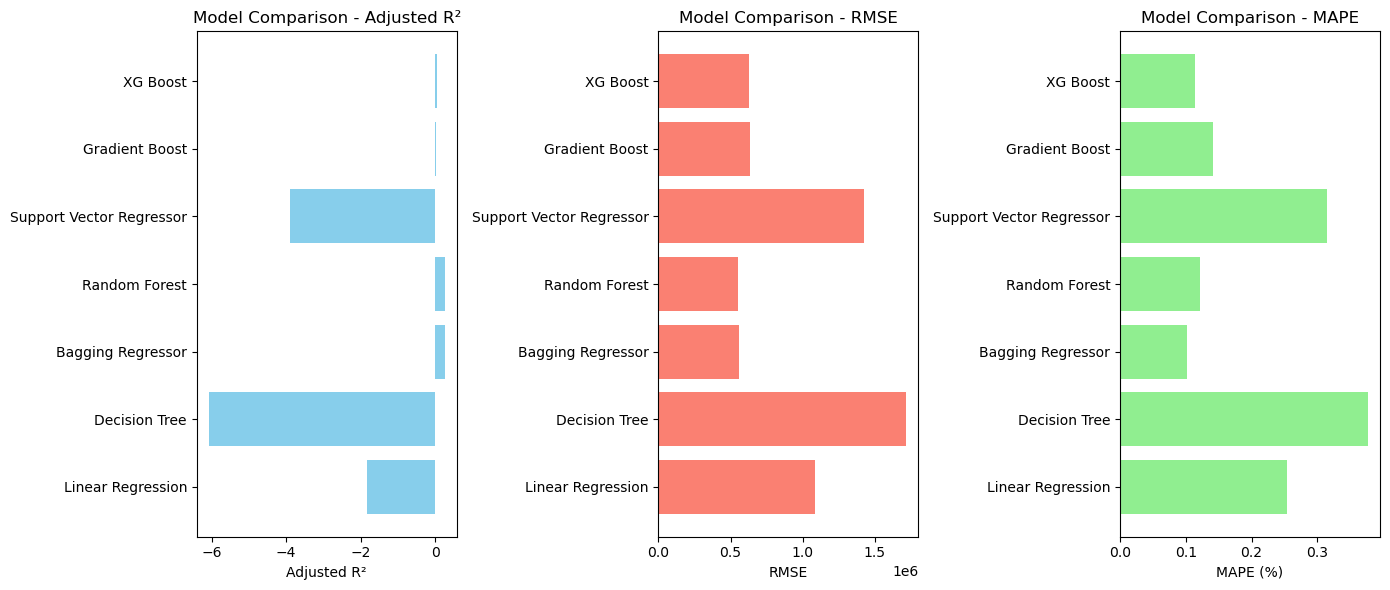

In [166]:
plt.figure(figsize=(14, 6))

# Bar plot for Adjusted R²
plt.subplot(1, 3, 1)
plt.barh(algo_list, adjusted_r2_list, color='skyblue')
plt.xlabel('Adjusted R²')
plt.title('Model Comparison - Adjusted R²')

# Bar plot for RMSE
plt.subplot(1, 3, 2)
plt.barh(algo_list, rmse_list, color='salmon')
plt.xlabel('RMSE')
plt.title('Model Comparison - RMSE')

# Bar plot for MAPE
plt.subplot(1, 3, 3)
plt.barh(algo_list, mape_list, color='lightgreen')
plt.xlabel('MAPE (%)')
plt.title('Model Comparison - MAPE')

plt.tight_layout()
plt.show()